In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
from sklearn.metrics import adjusted_mutual_info_score

In [4]:
data = sio.loadmat('ami_results.mat') # output of ami_script.m
meanNMI = data['mean_nmi']
stdNMI = data['std_nmi']
percVox = data['perc_vox']
stdPerc = data['std_perc']

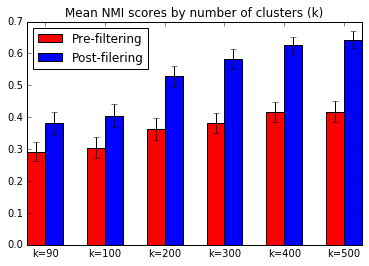

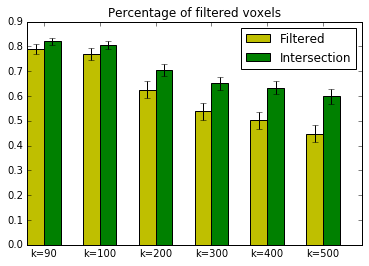

In [7]:
fig, ax = plt.subplots()

ind = np.arange(6)    # the x locations for the groups
width = 0.30         # the width of the bars
p1 = ax.bar(ind, meanNMI[:,0], width, color='r', bottom=0, yerr=stdNMI[:,0], ecolor='k')

p2 = ax.bar(ind + width, meanNMI[:,1], width, color='b', bottom=0, yerr=stdNMI[:,1], ecolor='k')

ax.set_title('Mean NMI scores by number of clusters (k)')
ax.set_xticks(ind + width)
ax.set_xticklabels(('k=90', 'k=100', 'k=200', 'k=300', 'k=400', 'k=500'))

ax.legend((p1[0], p2[0]), ('Pre-filtering', 'Post-filering'), loc='best')
ax.autoscale_view()

plt.show()



fig, ax = plt.subplots()

ind = np.arange(6)    # the x locations for the groups
width = 0.30         # the width of the bars
p1 = ax.bar(ind, percVox[:,0], width, color='y', bottom=0, yerr=stdPerc[:,0], ecolor='k')

p2 = ax.bar(ind + width, percVox[:,1], width, color='g', bottom=0, yerr=stdPerc[:,1], ecolor='k')

ax.set_title('Percentage of filtered voxels')
ax.set_xticks(ind + width)
ax.set_xticklabels(('k=90', 'k=100', 'k=200', 'k=300', 'k=400', 'k=500'))

ax.legend((p1[0], p2[0]), ('Filtered', 'Intersection'),loc='best')

plt.show()


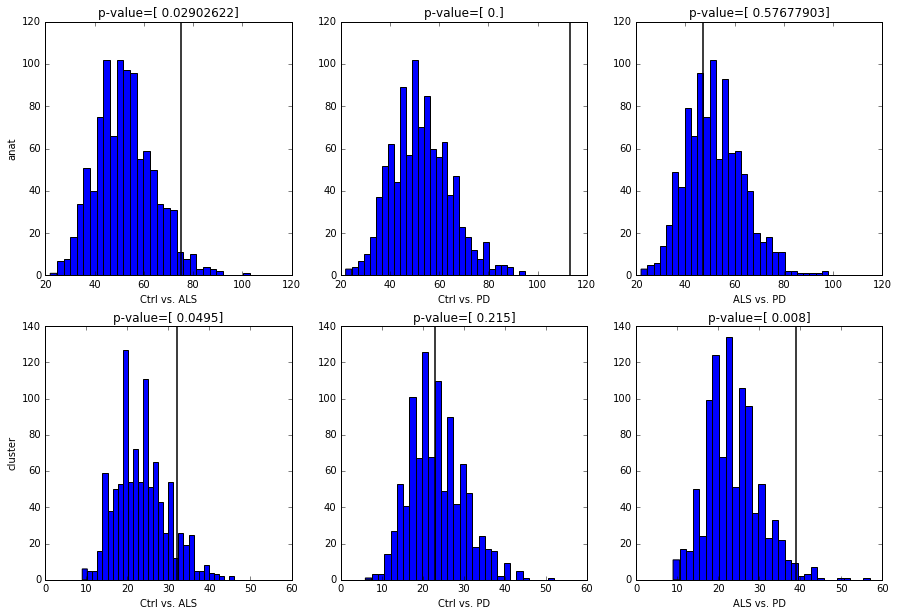

In [51]:
data = sio.loadmat('kendall_perm1000.mat') # output of kendall+jaccard_script.R
f, axs = plt.subplots(2,3,figsize=(15,10))
plt.subplot(231)
plt.hist(data['kdists_an'][np.where(data['kdists_an'][:,0]!=0)[0],0], bins=30)
plt.vlines(data['CtrlSla_an'], 0, 120, linewidth=1.5)
plt.xlim([20,120])
plt.ylabel('anat')
plt.xlabel('Ctrl vs. ALS')
plt.title('p-value={}'.format(data['pCtrlSla_an']))
plt.subplot(232)
plt.hist(data['kdists_an'][np.where(data['kdists_an'][:,1]!=0)[0],1], bins=30)
plt.vlines(data['CtrlPark_an'], 0, 120, linewidth=1.5)
plt.xlim([20,120])
plt.xlabel('Ctrl vs. PD')
plt.title('p-value={}'.format(data['pCtrlPark_an']))
plt.subplot(233)
plt.hist(data['kdists_an'][np.where(data['kdists_an'][:,2]!=0)[0],2], bins=30)
plt.vlines(data['SlaPark_an'], 0, 120, linewidth=1.5)
plt.xlim([20,120])
plt.xlabel('ALS vs. PD')
plt.title('p-value={}'.format(data['pSlaPark_an']))
plt.subplot(234)
plt.hist(data['kdists_cl'][np.where(data['kdists_cl'][:,0]!=0)[0],0], bins=30)
plt.vlines(data['CtrlSla_cl'], 0, 140, linewidth=1.5)
plt.xlim([0,60])
plt.ylabel('cluster')
plt.xlabel('Ctrl vs. ALS')
plt.title('p-value={}'.format(data['pCtrlSla_cl']))
plt.subplot(235)
plt.hist(data['kdists_cl'][np.where(data['kdists_cl'][:,1]!=0)[0],1], bins=30)
plt.vlines(data['CtrlPark_cl'], 0, 140, linewidth=1.5)
plt.xlim([0,60])
plt.xlabel('Ctrl vs. PD')
plt.title('p-value={}'.format(data['pCtrlPark_cl']))
plt.subplot(236)
plt.hist(data['kdists_cl'][np.where(data['kdists_cl'][:,2]!=0)[0],2], bins=30)
plt.vlines(data['SlaPark_cl'], 0, 140, linewidth=1.5)
plt.xlim([0,60])
plt.xlabel('ALS vs. PD')
plt.title('p-value={}'.format(data['pSlaPark_cl']))